In [1]:
import keras
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
keras.__version__

c:\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

In [2]:
# Get images
image = img_to_array(load_img('golf.jpg'))
image = np.array(image, dtype=float)

In [3]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [4]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [5]:
# Finish model
filepath="model_v1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1,save_best_only=True,mode='max')
model.compile(optimizer='rmsprop', loss='mse',metrics=['acc'])

In [6]:
history = model.fit(x=X,y=Y,batch_size=1,epochs=1000,callbacks=[checkpoint], verbose=2)

Epoch 1/1000
 - 3s - loss: 0.3261 - acc: 0.0940

Epoch 00001: acc improved from -inf to 0.09402, saving model to model_v1.h5
Epoch 2/1000
 - 0s - loss: 0.0101 - acc: 0.8950

Epoch 00002: acc improved from 0.09402 to 0.89499, saving model to model_v1.h5
Epoch 3/1000
 - 0s - loss: 0.0290 - acc: 0.9022

Epoch 00003: acc improved from 0.89499 to 0.90218, saving model to model_v1.h5
Epoch 4/1000
 - 0s - loss: 0.0202 - acc: 0.8957

Epoch 00004: acc did not improve
Epoch 5/1000
 - 0s - loss: 0.0099 - acc: 0.9040

Epoch 00005: acc improved from 0.90218 to 0.90403, saving model to model_v1.h5
Epoch 6/1000
 - 0s - loss: 0.0066 - acc: 0.9039

Epoch 00006: acc did not improve
Epoch 7/1000
 - 0s - loss: 0.0068 - acc: 0.9040

Epoch 00007: acc did not improve
Epoch 8/1000
 - 0s - loss: 0.0090 - acc: 0.9040

Epoch 00008: acc improved from 0.90403 to 0.90405, saving model to model_v1.h5
Epoch 9/1000
 - 0s - loss: 0.0115 - acc: 0.9050

Epoch 00009: acc improved from 0.90405 to 0.90505, saving model to m


Epoch 00089: acc did not improve
Epoch 90/1000
 - 0s - loss: 0.0033 - acc: 0.9134

Epoch 00090: acc did not improve
Epoch 91/1000
 - 0s - loss: 0.0046 - acc: 0.9290

Epoch 00091: acc did not improve
Epoch 92/1000
 - 0s - loss: 0.0034 - acc: 0.9090

Epoch 00092: acc did not improve
Epoch 93/1000
 - 0s - loss: 0.0048 - acc: 0.9306

Epoch 00093: acc improved from 0.93014 to 0.93062, saving model to model_v1.h5
Epoch 94/1000
 - 0s - loss: 0.0031 - acc: 0.9108

Epoch 00094: acc did not improve
Epoch 95/1000
 - 0s - loss: 0.0041 - acc: 0.9314

Epoch 00095: acc improved from 0.93062 to 0.93143, saving model to model_v1.h5
Epoch 96/1000
 - 0s - loss: 0.0031 - acc: 0.9146

Epoch 00096: acc did not improve
Epoch 97/1000
 - 0s - loss: 0.0042 - acc: 0.9330

Epoch 00097: acc improved from 0.93143 to 0.93299, saving model to model_v1.h5
Epoch 98/1000
 - 0s - loss: 0.0033 - acc: 0.9099

Epoch 00098: acc did not improve
Epoch 99/1000
 - 0s - loss: 0.0046 - acc: 0.9312

Epoch 00099: acc did not improv


Epoch 00176: acc did not improve
Epoch 177/1000
 - 0s - loss: 0.0027 - acc: 0.9485

Epoch 00177: acc did not improve
Epoch 178/1000
 - 0s - loss: 0.0022 - acc: 0.9422

Epoch 00178: acc did not improve
Epoch 179/1000
 - 0s - loss: 0.0029 - acc: 0.9521

Epoch 00179: acc did not improve
Epoch 180/1000
 - 0s - loss: 0.0022 - acc: 0.9327

Epoch 00180: acc did not improve
Epoch 181/1000
 - 0s - loss: 0.0029 - acc: 0.9550

Epoch 00181: acc improved from 0.95425 to 0.95496, saving model to model_v1.h5
Epoch 182/1000
 - 0s - loss: 0.0024 - acc: 0.9123

Epoch 00182: acc did not improve
Epoch 183/1000
 - 0s - loss: 0.0028 - acc: 0.9541

Epoch 00183: acc did not improve
Epoch 184/1000
 - 0s - loss: 0.0020 - acc: 0.9327

Epoch 00184: acc did not improve
Epoch 185/1000
 - 0s - loss: 0.0024 - acc: 0.9544

Epoch 00185: acc did not improve
Epoch 186/1000
 - 0s - loss: 0.0020 - acc: 0.9460

Epoch 00186: acc did not improve
Epoch 187/1000
 - 0s - loss: 0.0024 - acc: 0.9508

Epoch 00187: acc did not impr

 - 0s - loss: 0.0019 - acc: 0.9591

Epoch 00271: acc improved from 0.95831 to 0.95907, saving model to model_v1.h5
Epoch 272/1000
 - 0s - loss: 0.0017 - acc: 0.9509

Epoch 00272: acc did not improve
Epoch 273/1000
 - 0s - loss: 0.0021 - acc: 0.9585

Epoch 00273: acc did not improve
Epoch 274/1000
 - 0s - loss: 0.0017 - acc: 0.9424

Epoch 00274: acc did not improve
Epoch 275/1000
 - 0s - loss: 0.0020 - acc: 0.9563

Epoch 00275: acc did not improve
Epoch 276/1000
 - 0s - loss: 0.0018 - acc: 0.9393

Epoch 00276: acc did not improve
Epoch 277/1000
 - 0s - loss: 0.0023 - acc: 0.9598

Epoch 00277: acc improved from 0.95907 to 0.95977, saving model to model_v1.h5
Epoch 278/1000
 - 0s - loss: 0.0020 - acc: 0.9141

Epoch 00278: acc did not improve
Epoch 279/1000
 - 0s - loss: 0.0022 - acc: 0.9548

Epoch 00279: acc did not improve
Epoch 280/1000
 - 0s - loss: 0.0018 - acc: 0.9488

Epoch 00280: acc did not improve
Epoch 281/1000
 - 0s - loss: 0.0020 - acc: 0.9556

Epoch 00281: acc did not improve


Epoch 00366: acc did not improve
Epoch 367/1000
 - 0s - loss: 0.0015 - acc: 0.9549

Epoch 00367: acc did not improve
Epoch 368/1000
 - 0s - loss: 0.0016 - acc: 0.9522

Epoch 00368: acc did not improve
Epoch 369/1000
 - 0s - loss: 0.0019 - acc: 0.9596

Epoch 00369: acc did not improve
Epoch 370/1000
 - 0s - loss: 0.0014 - acc: 0.9549

Epoch 00370: acc did not improve
Epoch 371/1000
 - 0s - loss: 0.0014 - acc: 0.9593

Epoch 00371: acc did not improve
Epoch 372/1000
 - 0s - loss: 0.0013 - acc: 0.9481

Epoch 00372: acc did not improve
Epoch 373/1000
 - 0s - loss: 0.0014 - acc: 0.9621

Epoch 00373: acc improved from 0.96153 to 0.96206, saving model to model_v1.h5
Epoch 374/1000
 - 0s - loss: 0.0014 - acc: 0.9459

Epoch 00374: acc did not improve
Epoch 375/1000
 - 0s - loss: 0.0017 - acc: 0.9623

Epoch 00375: acc improved from 0.96206 to 0.96226, saving model to model_v1.h5
Epoch 376/1000
 - 0s - loss: 0.0018 - acc: 0.9501

Epoch 00376: acc did not improve
Epoch 377/1000
 - 0s - loss: 0.002

Epoch 462/1000
 - 0s - loss: 0.0010 - acc: 0.9574

Epoch 00462: acc did not improve
Epoch 463/1000
 - 0s - loss: 0.0011 - acc: 0.9629

Epoch 00463: acc did not improve
Epoch 464/1000
 - 0s - loss: 0.0011 - acc: 0.9535

Epoch 00464: acc did not improve
Epoch 465/1000
 - 0s - loss: 0.0013 - acc: 0.9637

Epoch 00465: acc did not improve
Epoch 466/1000
 - 0s - loss: 0.0013 - acc: 0.9512

Epoch 00466: acc did not improve
Epoch 467/1000
 - 0s - loss: 0.0015 - acc: 0.9611

Epoch 00467: acc did not improve
Epoch 468/1000
 - 0s - loss: 0.0013 - acc: 0.9369

Epoch 00468: acc did not improve
Epoch 469/1000
 - 0s - loss: 0.0014 - acc: 0.9528

Epoch 00469: acc did not improve
Epoch 470/1000
 - 0s - loss: 0.0013 - acc: 0.9302

Epoch 00470: acc did not improve
Epoch 471/1000
 - 0s - loss: 0.0015 - acc: 0.9623

Epoch 00471: acc did not improve
Epoch 472/1000
 - 0s - loss: 0.0012 - acc: 0.9312

Epoch 00472: acc did not improve
Epoch 473/1000
 - 0s - loss: 0.0013 - acc: 0.9601

Epoch 00473: acc did not 


Epoch 00558: acc did not improve
Epoch 559/1000
 - 0s - loss: 0.0010 - acc: 0.9589

Epoch 00559: acc did not improve
Epoch 560/1000
 - 0s - loss: 0.0013 - acc: 0.9582

Epoch 00560: acc did not improve
Epoch 561/1000
 - 0s - loss: 0.0018 - acc: 0.9485

Epoch 00561: acc did not improve
Epoch 562/1000
 - 0s - loss: 0.0023 - acc: 0.9616

Epoch 00562: acc did not improve
Epoch 563/1000
 - 0s - loss: 0.0012 - acc: 0.9157

Epoch 00563: acc did not improve
Epoch 564/1000
 - 0s - loss: 0.0010 - acc: 0.9538

Epoch 00564: acc did not improve
Epoch 565/1000
 - 0s - loss: 9.7660e-04 - acc: 0.9315

Epoch 00565: acc did not improve
Epoch 566/1000
 - 0s - loss: 9.0397e-04 - acc: 0.9610

Epoch 00566: acc did not improve
Epoch 567/1000
 - 0s - loss: 8.3218e-04 - acc: 0.9559

Epoch 00567: acc did not improve
Epoch 568/1000
 - 0s - loss: 8.3924e-04 - acc: 0.9592

Epoch 00568: acc did not improve
Epoch 569/1000
 - 0s - loss: 8.4876e-04 - acc: 0.9599

Epoch 00569: acc did not improve
Epoch 570/1000
 - 0s -


Epoch 00653: acc did not improve
Epoch 654/1000
 - 0s - loss: 9.7614e-04 - acc: 0.9377

Epoch 00654: acc did not improve
Epoch 655/1000
 - 0s - loss: 0.0011 - acc: 0.9573

Epoch 00655: acc did not improve
Epoch 656/1000
 - 0s - loss: 9.5516e-04 - acc: 0.9410

Epoch 00656: acc did not improve
Epoch 657/1000
 - 0s - loss: 9.5284e-04 - acc: 0.9574

Epoch 00657: acc did not improve
Epoch 658/1000
 - 0s - loss: 8.7706e-04 - acc: 0.9479

Epoch 00658: acc did not improve
Epoch 659/1000
 - 0s - loss: 9.2028e-04 - acc: 0.9595

Epoch 00659: acc did not improve
Epoch 660/1000
 - 0s - loss: 8.1281e-04 - acc: 0.9499

Epoch 00660: acc did not improve
Epoch 661/1000
 - 0s - loss: 8.2440e-04 - acc: 0.9602

Epoch 00661: acc did not improve
Epoch 662/1000
 - 0s - loss: 8.3556e-04 - acc: 0.9504

Epoch 00662: acc did not improve
Epoch 663/1000
 - 0s - loss: 8.5901e-04 - acc: 0.9592

Epoch 00663: acc did not improve
Epoch 664/1000
 - 0s - loss: 8.6672e-04 - acc: 0.9516

Epoch 00664: acc did not improve
Ep

 - 0s - loss: 7.3473e-04 - acc: 0.9553

Epoch 00748: acc did not improve
Epoch 749/1000
 - 0s - loss: 7.3242e-04 - acc: 0.9614

Epoch 00749: acc did not improve
Epoch 750/1000
 - 0s - loss: 7.2825e-04 - acc: 0.9506

Epoch 00750: acc did not improve
Epoch 751/1000
 - 0s - loss: 7.2828e-04 - acc: 0.9601

Epoch 00751: acc did not improve
Epoch 752/1000
 - 0s - loss: 7.4713e-04 - acc: 0.9404

Epoch 00752: acc did not improve
Epoch 753/1000
 - 0s - loss: 7.9696e-04 - acc: 0.9587

Epoch 00753: acc did not improve
Epoch 754/1000
 - 0s - loss: 8.9783e-04 - acc: 0.9328

Epoch 00754: acc did not improve
Epoch 755/1000
 - 0s - loss: 0.0012 - acc: 0.9604

Epoch 00755: acc did not improve
Epoch 756/1000
 - 0s - loss: 0.0017 - acc: 0.9256

Epoch 00756: acc did not improve
Epoch 757/1000
 - 0s - loss: 0.0015 - acc: 0.9599

Epoch 00757: acc did not improve
Epoch 758/1000
 - 0s - loss: 9.6700e-04 - acc: 0.9293

Epoch 00758: acc did not improve
Epoch 759/1000
 - 0s - loss: 7.2730e-04 - acc: 0.9577

Epoc


Epoch 00840: acc did not improve
Epoch 841/1000
 - 0s - loss: 7.6945e-04 - acc: 0.9548

Epoch 00841: acc did not improve
Epoch 842/1000
 - 0s - loss: 8.7847e-04 - acc: 0.9572

Epoch 00842: acc did not improve
Epoch 843/1000
 - 0s - loss: 9.0025e-04 - acc: 0.9432

Epoch 00843: acc did not improve
Epoch 844/1000
 - 0s - loss: 8.7981e-04 - acc: 0.9612

Epoch 00844: acc did not improve
Epoch 845/1000
 - 0s - loss: 8.2985e-04 - acc: 0.9380

Epoch 00845: acc did not improve
Epoch 846/1000
 - 0s - loss: 7.6969e-04 - acc: 0.9609

Epoch 00846: acc did not improve
Epoch 847/1000
 - 0s - loss: 7.9375e-04 - acc: 0.9440

Epoch 00847: acc did not improve
Epoch 848/1000
 - 0s - loss: 9.0929e-04 - acc: 0.9607

Epoch 00848: acc did not improve
Epoch 849/1000
 - 0s - loss: 0.0010 - acc: 0.9449

Epoch 00849: acc did not improve
Epoch 850/1000
 - 0s - loss: 0.0011 - acc: 0.9612

Epoch 00850: acc did not improve
Epoch 851/1000
 - 0s - loss: 9.0039e-04 - acc: 0.9411

Epoch 00851: acc did not improve
Epoch 

 - 0s - loss: 8.0692e-04 - acc: 0.9495

Epoch 00934: acc did not improve
Epoch 935/1000
 - 0s - loss: 8.7030e-04 - acc: 0.9625

Epoch 00935: acc did not improve
Epoch 936/1000
 - 0s - loss: 8.0119e-04 - acc: 0.9610

Epoch 00936: acc did not improve
Epoch 937/1000
 - 0s - loss: 8.2937e-04 - acc: 0.9203

Epoch 00937: acc did not improve
Epoch 938/1000
 - 0s - loss: 7.6084e-04 - acc: 0.9541

Epoch 00938: acc did not improve
Epoch 939/1000
 - 0s - loss: 7.6246e-04 - acc: 0.9272

Epoch 00939: acc did not improve
Epoch 940/1000
 - 0s - loss: 7.0127e-04 - acc: 0.9590

Epoch 00940: acc did not improve
Epoch 941/1000
 - 0s - loss: 7.7233e-04 - acc: 0.9486

Epoch 00941: acc did not improve
Epoch 942/1000
 - 0s - loss: 9.4679e-04 - acc: 0.9625

Epoch 00942: acc did not improve
Epoch 943/1000
 - 0s - loss: 0.0012 - acc: 0.9521

Epoch 00943: acc did not improve
Epoch 944/1000
 - 0s - loss: 0.0028 - acc: 0.9607

Epoch 00944: acc did not improve
Epoch 945/1000
 - 0s - loss: 0.0052 - acc: 0.9012

Epoc

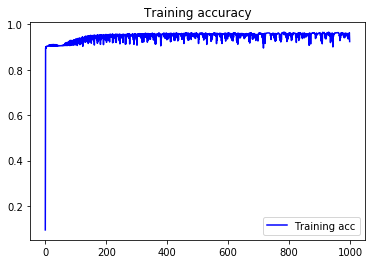

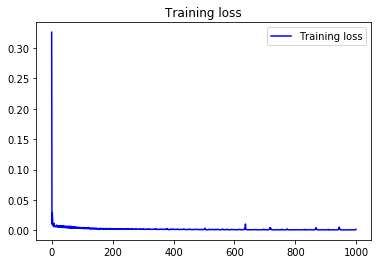

In [7]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 44ms/step
[0.002573425881564617, 0.959543764591217]


c:\anaconda3\envs\tensorflow\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
c:\anaconda3\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
c:\anaconda3\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
